In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

import pandas as pd
import scipy.io as scio
import pickle
import datetime

In [2]:
sheet = pd.read_excel("../../0 original data/MAREDAT/MAREDAT_pigments_master_file_Updated210313 - edit astype normal.xls",
                      sheet_name=0)
print(list(sheet))
print("\n",sheet.shape)

['Database_num', 'Cruise_des', 'F_TC', 'F_TA', 'F_TC_F_TA', 'F_Rat', 'F_Cr', 'Total_flags', 'Investigator', 'Datasource', 'Reference', 'Sample_num', 'Exp', 'Cruise', 'Site', 'Cruise_ID', 'Event_num', 'Station', 'CTD', 'Bottle_num', 'Lat', 'Long', 'Month', 'Day', 'Year', 'Depth (m)', 'Press (dbar)', 'Merged_depth (m)', 'Number_of_pigments', 'Total_Chla (ng/L)', 'Total_Acc (ng/L)', 'Total_Chla (mg/m3)', 'Total_Acc (mg/m3)', 'DVChla (ng/L)', 'Chla (ng/L)', 'Chla_ide (ng/L)', 'Chla_allom (ng/L)', 'Chla_prime (ng/L)', 'Chlb (ng/L)', 'DVChl b (ng/L)', 'Chlc (ng/L)', 'Chlc1_Chlc2_Mg_3_8_divinyl_pheoporphyrin_ a5 (ng/L)', 'Chlc1 (ng/L)', 'Chlc1_like (ng/L)', 'Chlc2 (ng/L)', 'Chlc1_Chlc2 (ng/L)', 'Chlc3 (ng/L)', 'MgDVP (ng/L)', '19Hex (ng/L)', '19But (ng/L)', 'Fucox (ng/L)', 'Perid (ng/L)', 'Prasino (ng/L)', 'Allox (ng/L)', 'Lutein (ng/L)', 'Zeax (ng/L)', 'Zea_Lut  (ng/L)', 'Violax (ng/L)', 'Alpha_car (ng/L)', 'Beta_car (ng/L)', 'Gamma_car (ng/L)', 'Epsilon_car (ng/L)', 'Alpha_Beta_car (ng/L)',

In [3]:

# 删除没有如下值的数据行
sheet.dropna(inplace=True,subset=['Lat','Long','Year','Month','Day','Merged_depth (m)'])

print(len(list(sheet)),len(sheet))

70 40535


In [4]:
# location and date&time
year = np.array(sheet["Year"]).astype(int)
month = np.array(sheet["Month"]).astype(int)
day = np.array(sheet["Day"]).astype(int)

lats = np.array(sheet["Lat"]).astype(float)
lons = np.array(sheet["Long"]).astype(float)
depths = np.array(sheet["Merged_depth (m)"]).astype(float)

In [5]:
tchl_a = np.array(sheet["Total_Chla (ng/L)"]).astype(float)
tchl_b = np.array(sheet["Chlb (ng/L)"]).astype(float)
hex_fuco = np.array(sheet["19Hex (ng/L)"]).astype(float)
but_fuco = np.array(sheet["19But (ng/L)"]).astype(float)
fuco = np.array(sheet["Fucox (ng/L)"]).astype(float)
perid = np.array(sheet["Perid (ng/L)"]).astype(float)
allo = np.array(sheet["Allox (ng/L)"]).astype(float)
zea = np.array(sheet["Zeax (ng/L)"]).astype(float)


dv_chl_a = np.array(sheet["DVChla (ng/L)"]).astype(float)
chl_a = np.array(sheet["Chla (ng/L)"]).astype(float)
dv_chl_b = np.array(sheet["DVChl b (ng/L)"]).astype(float)
chl_c12 = np.array(sheet["Chlc1_Chlc2 (ng/L)"]).astype(float)
chl_c3 = np.array(sheet["Chlc3 (ng/L)"]).astype(float)
pras = np.array(sheet["Prasino (ng/L)"]).astype(float)
lut = np.array(sheet["Lutein (ng/L)"]).astype(float)
viola = np.array(sheet["Violax (ng/L)"]).astype(float)
neo = np.array(sheet["Neox (ng/L)"]).astype(float)
phytin_a = np.array(sheet["Phytin_a (ng/L)"]).astype(float)
diadino = np.array(sheet["DD (ng/L)"]).astype(float)
diato = np.array(sheet["DT (ng/L)"]).astype(float)

# save data
data = {'tchl_a':tchl_a,
        'tchl_b':tchl_b,
        'hex_fuco':hex_fuco,
        'but_fuco':but_fuco,
        'fuco':fuco,
        'perid':perid,
        'allo':allo,
        'zea':zea,

        'dv_chl_a':dv_chl_a,
        'chl_a':chl_a,
        'dv_chl_b':dv_chl_b,
        'chl_c12':chl_c12,
        'chl_c3':chl_c3,
        'pras':pras,
        'lut':lut,
        'viola':viola,
        'neo':neo,
        'phytin_a':phytin_a,
        'diadino':diadino,
        'diato':diato}

for pigment in data: data[pigment] = data[pigment]/1000.

In [6]:
dates = []
for i in range(len(year)):
    dates.append(datetime.datetime(year=year[i],month=month[i],day=day[i]))

In [7]:
with open("../../0 save inner data/1 read MAREDAT.pkl", 'wb') as f:
    pickle.dump([dates, lons, lats, depths, data], f)

In [8]:
with open("../../0 save data/read MAREDAT.txt",'w') as f:
    write_str = "date time"+"\t"+"lat"+"\t"+"lon"+"\t"+"depth"+"\t"
    for var in data:write_str = write_str+var+"\t"
    f.write(write_str+"\n")
    for i in range(len(lats)):
        write_str = str(dates[i])+"\t"+str(lats[i])+"\t"+str(lons[i])+"\t"+str(depths[i])+"\t"
        for var in data: write_str = (write_str+str(data[var][i])+"\t") if data[var][i]==data[var][i] else (write_str+str(-999)+"\t")
        f.write(write_str+"\n")

(0.0, 1250.0)

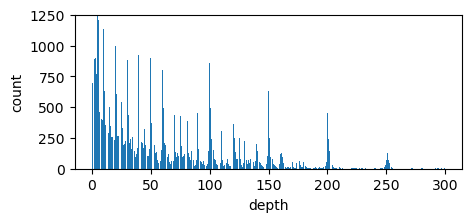

In [9]:
import matplotlib.pyplot as plt
dep = np.array(depths)
count = []
for i in range(300):
    count.append((dep<=i).sum())
count = np.array(count)

plt.figure(figsize=(5,2))
plt.bar(range(1,300),count[1:]-count[:-1])
plt.xlabel("depth")
plt.ylabel("count")
plt.ylim([0,1250])